In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset - assume glass_data.csv contains the data with relevant columns
# Let's assume the 4th column is aluminum content (x) and another column is refractive index (y)
data = pd.read_csv('glass.dat.txt',sep='\s+')
# print(data)
y=data['RI']
x=data['Al']


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aditi\AppData\Local\Temp\ipykernel_26140\2307880209.py:7: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('glass.dat.txt',sep='\s+')


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aditi\AppData\Local\Temp\ipykernel_26140\920504879.py:7: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('glass.dat.txt',sep='\s+')
C:\Users\aditi\AppData\Local\Temp\ipykernel_26140\920504879.py:29: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(w*y_train)/np.sum(w)


0.13122448979591836


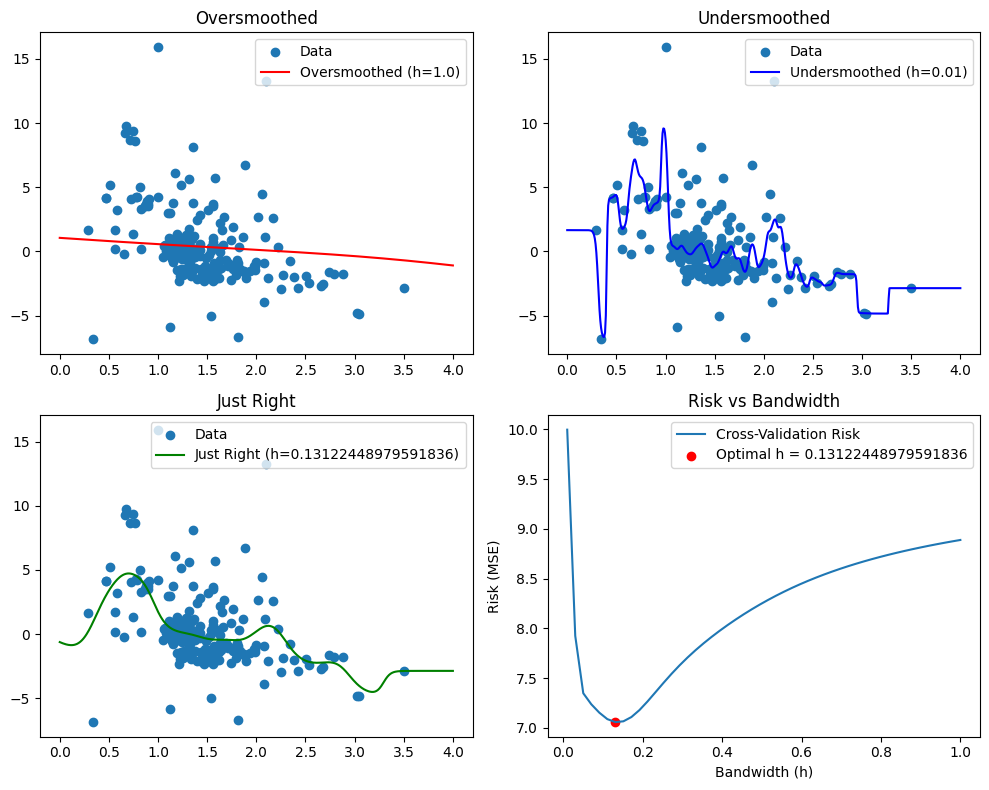

0.3214285714285714


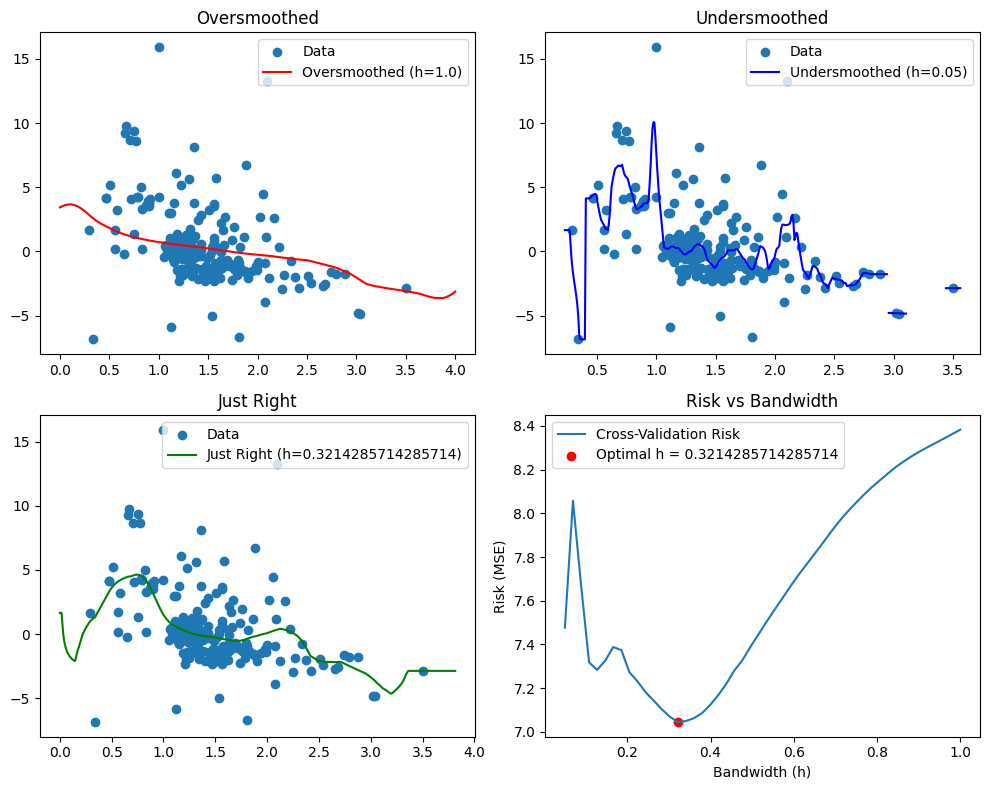

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset - assume glass_data.csv contains the data with relevant columns
# Let's assume the 4th column is aluminum content (x) and another column is refractive index (y)
data = pd.read_csv('glass.dat.txt',sep='\s+')
# print(data)
y=data['RI']
x=data['Al']

def gaussian_kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (u ** 2))

def epanechnikov_kernel(u):
    return 0.75 * (1 - u ** 2) * (np.abs(u) <= 1)

def nadaraya_watson(x_train, y_train, x_point, h, kernel):
    # print(kernel(1))
    # print(x_point)
    # print(x_train)
    nw=[]
    # print(x_train, y_train, x_point, h, kernel)
    for ele in x_train:
        
        newx=kernel((x_point-ele)/h)
        nw.append(newx)
    w=np.array(nw)
    return np.sum(w*y_train)/np.sum(w)

def lpocv(x, y, bandwidth,kernal, p=4):
    n = len(x)
    errors = []
    
    for i in range(n):
        if not i>=211:
            # print(i)
            # print(p)
            idx_val = np.arange(i, min(i + p, n)) 
        idx_val=idx_val.astype(int)
        # print(idx_val)
        idx_train = np.delete(np.arange(n), idx_val)
        # print(idx_train)
        # print(type(x))
        x_train, y_train = x.iloc[idx_train], y.iloc[idx_train]
        x_val, y_val = x.iloc[idx_val], y.iloc[idx_val]
        # print("band",bandwidth)
        y_pred = np.array([nadaraya_watson(x_train, y_train, x_v, bandwidth, kernal) for x_v in x_val])
        
        error = np.mean((y_pred - y_val) ** 2)
        errors.append(error)
    
    
    return np.mean(errors)

def find_optimal_bandwidth(x, y, kernel, h_values):
    risks = []
    
    for h in h_values:
        risk = lpocv(x, y, h, kernel,4)
        risks.append(risk)
    
    optimal_h = h_values[np.argmin(risks)]
    print(optimal_h)
    return optimal_h, risks

def generate_plots(x, y, kernel, h_values, kernel_name):
    # optimal bandwidth
    optimal_h, risks = find_optimal_bandwidth(x, y, kernel, h_values)
    
    # Oversmoothed
    small_h = min(h_values)
    
    # Undersmoothed
    large_h = max(h_values)
    
    # Just Right
    just_right_h = optimal_h
    
    # Create subplots
    plt.figure(figsize=(10, 8))
    new_x=np.linspace(0, 4, 500)
    
    # Oversmoothed
    plt.subplot(2, 2, 1)
    y_pred_large_h = [nadaraya_watson(x, y, x_point, large_h, kernel) for x_point in new_x]
    plt.scatter(x, y, label='Data')
    plt.plot(new_x, y_pred_large_h, label=f'Oversmoothed (h={large_h})', color='red')
    plt.title('Oversmoothed')
    plt.legend()
    
    # Undersmoothed
    plt.subplot(2, 2, 2)
    y_pred_small_h = [nadaraya_watson(x, y, x_point, just_right_h/5, kernel) for x_point in new_x]
    plt.scatter(x, y, label='Data')
    plt.plot(new_x, y_pred_small_h, label=f'Undersmoothed (h={small_h})', color='blue')
    plt.title('Undersmoothed')
    plt.legend()
    
    # Just Right
    plt.subplot(2, 2, 3)
    y_pred_just_right_h = [nadaraya_watson(x, y, x_point, just_right_h, kernel) for x_point in new_x]
    plt.scatter(x, y, label='Data')
    plt.plot(new_x, y_pred_just_right_h, label=f'Just Right (h={just_right_h})', color='green')
    plt.title('Just Right')
    plt.legend()
    
    # Cross-Validation Curve
    plt.subplot(2, 2, 4)
    plt.plot(h_values, risks, label='Cross-Validation Risk')
    plt.scatter([optimal_h], [min(risks)], color='red', label=f'Optimal h = {optimal_h}')
    plt.title('Risk vs Bandwidth')
    plt.xlabel('Bandwidth (h)')
    plt.ylabel('Risk (MSE)')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f"{kernel_name}_kernel_regression.png")
    plt.show()


h_values = np.linspace(0.01, 1, 50)

generate_plots(x,y,gaussian_kernel,h_values,'gaussian')
h_values = np.linspace(0.05, 1, 50)
generate_plots(x,y,epanechnikov_kernel,h_values,'epanechnikov')
